# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../Part01/lena.png')

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

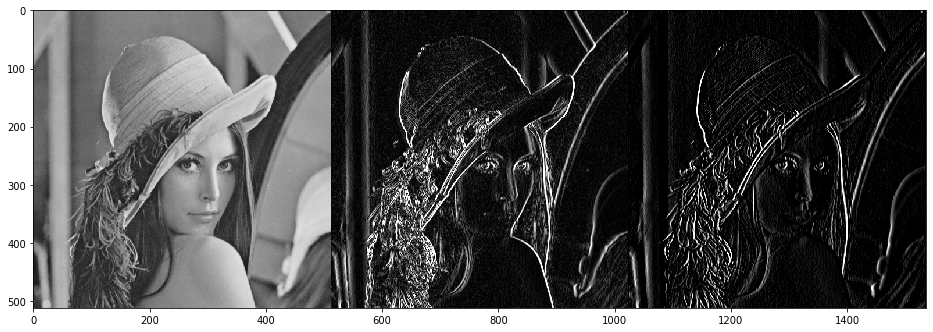

In [14]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, 1, 0)

#x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
#y = cv2.Sobel(img, cv2.CV_16S, 0, 1)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, cv2.CV_8U, 1, 0)

##　組合 + 顯示圖片
#img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
#while True:
#    # 比較 Sobel 邊緣檢測的過程中針對負數操作的不同產生的差異
#    cv2.imshow('Edge Detection', img_show)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break

##　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
#OpenCV is BGR Cover to Plt RGB
#b,g,r = cv2.split(img_show)  
#img_show_ = cv2.merge([r,g,b]) 
plt.figure(num='astronaut',figsize=(16,16))  #创建一个名为astronaut的窗口,并设置大小 
plt.imshow(img_show, cmap='gray')
plt.show()

### 比較一次與兩次計算偏微分的結果

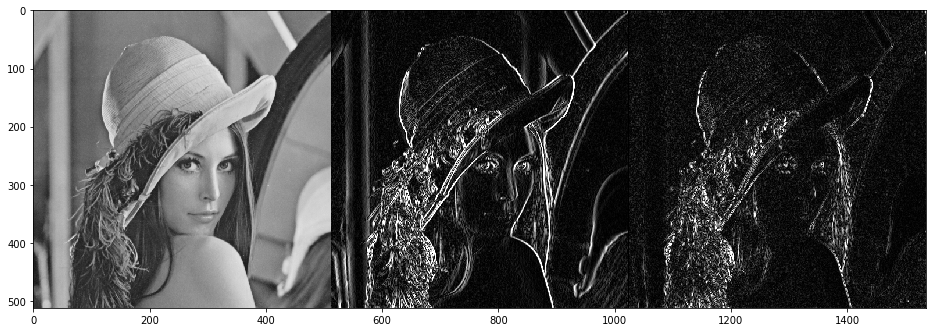

In [18]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3) #ksize是Sobel運算元的大小，必須為1、3、5、7
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_grey, cv2.CV_16S, dx=2, dy=0, ksize=3) #ksize是Sobel運算元的大小，必須為1、3、5、7
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)

img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



##　組合 + 顯示圖片
#img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
#while True:
#    cv2.imshow('Edge Detection', img_show)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break

##　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
#OpenCV is BGR Cover to Plt RGB
#b,g,r = cv2.split(img_show)  
#img_show_ = cv2.merge([r,g,b]) 
plt.figure(num='astronaut',figsize=(16,16))  #创建一个名为astronaut的窗口,并设置大小 
plt.imshow(img_show, cmap='gray')
plt.show()